# Install library

원인은 모르겠는데,<br>
vizro 설치해도 import가 안 됨<br><br>
flask, dash를 지우고 <br>
flask, dash, vizro를 설치해야 함<br><br>
혹시 모르니 설치과정 그대로 남겨둠

In [ ]:
'''
!pip install vizro
!pip uninstall flask -y
!pip uninstall dash -y
!pip install flask
!pip install dash
!pip install vizro
'''

# Import Library

In [1]:
import flask
import dash
import vizro
import vizro.plotly.express as px
from vizro import Vizro
import vizro.models as vm

# vizro 시작해보기

In [2]:


Vizro._reset()

df = px.data.iris()

page_1 = vm.Page(
    title="My first dashboard11",
    components=[
        vm.Graph(id="scatter_chart_1", figure=px.scatter(df, x="sepal_length", y="petal_width", color="species")),
        vm.Graph(id="hist_chart_1", figure=px.histogram(df, x="sepal_width", color="species")),
    ],
    controls=[
        vm.Filter(column="sepal_width", selector=vm.Dropdown(), targets=["hist_chart_1"]),
    ],
)

page_2 = vm.Page(
    title="My Second dashboard22",
    components=[
        vm.Graph(id="scatter_chart_2", figure=px.scatter(df, x="petal_length", y="petal_width", color="species")),
        vm.Graph(id="hist_chart_2", figure=px.histogram(df, x="petal_width", color="species")),
    ],
    controls=[
        vm.Filter(column="petal_width", selector=vm.Dropdown(), targets=["hist_chart_2"]),
    ],
)

dashboard = vm.Dashboard(pages=[page_1, page_2],
                         navigation=vm.Navigation(pages=["My first dashboard11","My Second dashboard22"]))

Vizro().build(dashboard).run()

<a>http://127.0.0.1:8050</a>으로 접속할 수 있음<br><br>
들어가서 이것 저것 만져봅시다.

# Layout 설명

vizro는 기본적으로 화면을 4개의 container로 분할하고 시작함.

1. Navigation container
    * <b>navigation</b>을 설정하는 부분<br>
2. Control container
    * <b>Filters</b>나 <b>Parameters</b>처럼 우측의 <b>components</b>와 상호작용할 수 있는 <b>controls</b>들이 위치함<br>
3. Page header container
    * <b>Page title</b>과 <b>theme toggle switch</b>가 위치함<br>
4. Component container
    * <b>Component</b>들이 위치하는 곳. 실질적인 Chart등이 위치함
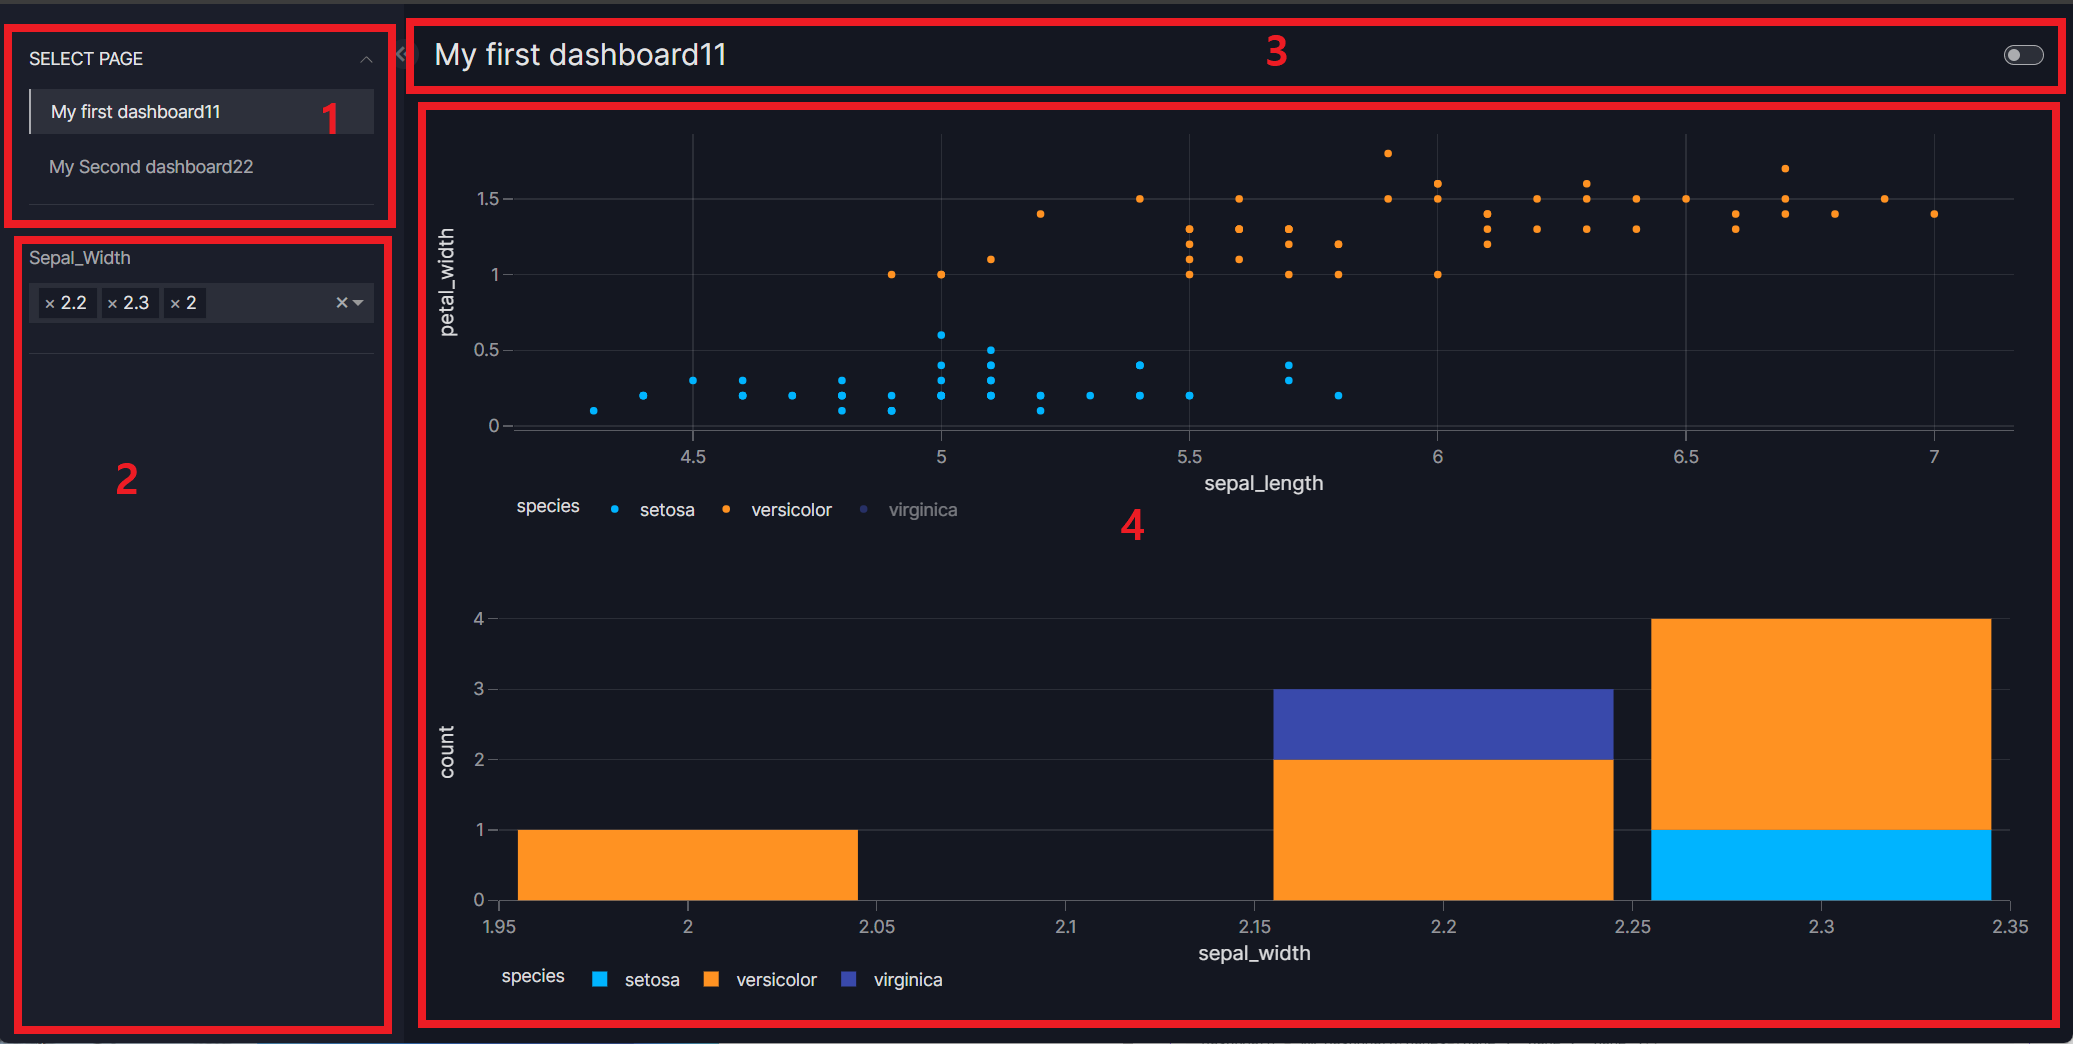



# Navigation container

## Navigation을 설정하지 않을 경우
vm.Dashboard()에서 <br>
navigation을 따로 설정해주지 않더라도,<br>
Page가 여러 개일 경우, 자동으로 구현됨

In [3]:
#반복되는 코드를 줄이기 위해 Page 함수화

def get_pages(df):
    page_1 = vm.Page(
        title="My first dashboard11",
        components=[
            vm.Graph(id="scatter_chart_1", figure=px.scatter(df, x="sepal_length", y="petal_width", color="species")),
            vm.Graph(id="hist_chart_1", figure=px.histogram(df, x="sepal_width", color="species")),
        ],
        controls=[
            vm.Filter(column="sepal_width", selector=vm.Dropdown(), targets=["hist_chart_1"]),
        ],
    )

    page_2 = vm.Page(
        title="My Second dashboard22",
        components=[
            vm.Graph(id="scatter_chart_2", figure=px.scatter(df, x="petal_length", y="petal_width", color="species")),
            vm.Graph(id="hist_chart_2", figure=px.histogram(df, x="petal_width", color="species")),
        ],
        controls=[
            vm.Filter(column="petal_width", selector=vm.Dropdown(), targets=["hist_chart_2"]),
        ],
    )

    page_3 = vm.Page(
        title="My Third dashboard33",
        components=[
            vm.Graph(id="scatter_chart_3", figure=px.scatter(df, x="petal_length", y="petal_width", color="species")),
            vm.Graph(id="hist_chart_3", figure=px.histogram(df, x="petal_width", color="species")),
        ],
        controls=[
            vm.Filter(column="petal_width", selector=vm.Dropdown(), targets=["hist_chart_3"]),
        ],
    )    
    return page_1, page_2, page_3

In [4]:
Vizro._reset()
page_1, page_2, page_3 = get_pages(df)

dashboard = vm.Dashboard(pages=[page_1, page_2, page_3],
                         navigation=vm.Navigation(
                             pages=["My first dashboard11","My Second dashboard22","My Third dashboard33"]))

Vizro().build(dashboard).run()

ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\hwoar\anaconda3\Lib\site-packages\flask\app.py", line 1473, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hwoar\anaconda3\Lib\site-packages\flask\app.py", line 882, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hwoar\anaconda3\Lib\site-packages\flask\app.py", line 880, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hwoar\anaconda3\Lib\site-packages\flask\app.py", line 865, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hwoar\anaconda3\Lib\site-packages\dash\dash.py", line 1025, in index
    scripts = self._generate_scripts_ht

## Page 일부만 Navigation 포함

3개의 Page 중 2개만 Navigation에 포함할 수도 있음

In [5]:
Vizro._reset()

page_1, page_2, page_3 = get_pages(df)

dashboard = vm.Dashboard(pages=[page_1, page_2])

Vizro().build(dashboard).run()

## Page를 그룹화

Page를 그룹화할 수 있음

In [6]:
Vizro._reset()
page_1, page_2, page_3 = get_pages(df)

dashboard = vm.Dashboard(pages=[page_1, page_2, page_3],
                        navigation=vm.Navigation(
                            pages={"Group A": ["My first dashboard11", "My Second dashboard22"], 
                                   "Group B": ["My Third dashboard33"]}))

Vizro().build(dashboard).run()

## Navigation 왼쪽에 icon

가장 쉽게 왼쪽에 icon 삽입하는 방식임.<br>
vm.Navigation에 pages를 넣어주고, <br>
nav_selector=vm.NavBar()에서 이 안은 비워둠

In [7]:
Vizro._reset()
data_pages = get_pages(df)

dashboard = vm.Dashboard(pages=data_pages,
                        navigation=vm.Navigation(
                            pages={"Group A": ["My first dashboard11", "My Second dashboard22"], 
                                   "Group B": ["My Third dashboard33"]},
                            nav_selector=vm.NavBar()))

Vizro().build(dashboard).run()

그룹 B에서 SELECT PAGE가 없는 이유는?<br>
Page가 1개 밖에 없어서.

## Navigation bar 꾸미기 - NavSelector

아래와 같이, NavBar를 설정하면,<br>
Navigation bar를 꾸밀 수 있음.<br><br>
이 예제는 섹션1개에 Group A, Group B 넣은 거임

In [ ]:
Vizro._reset()
data_pages = get_pages(df)

dashboard = vm.Dashboard(pages=data_pages,
    navigation=vm.Navigation(nav_selector=vm.NavBar(
        items=[
            vm.NavLink(
                label="Section 1",
                pages={"Group A": ["My first dashboard11", "My Second dashboard22"], 
                       "Group B": ["My Third dashboard33"]},
                )
        ]
    )))

Vizro().build(dashboard).run()

## Google Icon가져와서 꾸며보기  + Section 여러 개 삽입하기

google icon에서 pie_chart, barchart 아이콘을 가져와서 사용함.<br>
(Icon만 bar, pie이지 실상 차트는 당연히 page에서 구현한 내용대로임)


In [ ]:
Vizro._reset()
data_pages = get_pages(df)

dashboard = vm.Dashboard(pages=data_pages,
    navigation=Navigation(nav_selector=vm.NavBar(
        items=[
            vm.NavLink(
                label="Section 1",
                icon="Bar Chart",
                pages=["My first dashboard11", "My Second dashboard22"],
            ),
            vm.NavLink(label="Section 2", icon="pie_chart", pages=["My Third dashboard33"]),
        ]
    )))

Vizro().build(dashboard).run()

# Controls

우측의 components와 상호작용하는 요소이다.<br>
<b>Filters</b>와 <b>Parameters</b>가 있다.

## Controls - Filters
Filters는 <br>
DataFrame의 Target Columns에 접근 후<br>
값에 따라 Row를 Filtering하는 느낌임<br><br>

무엇을 -> columns에 입력<br>
어떻게 -> 원하는 selector사용<br>
얼마나 -> User가 직접 입력함.

iris데이터로 scatter flot그린 Page임.<br>
controls에 vm.Filter를 넣었음.<br><br>

무엇을 -> columns에 입력 -> "species" column을 filtering할 것임.
어떻게 -> selector사용 -> 입력 안했음 -> 기본적으로 selector=vm.Dropdown() 임<br><br>

아래는 Filter에 selector를 입력 안한 경우임.<br>
자동으로 Checklist가 왼쪽에 생성됨

In [8]:
iris = px.data.iris()
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [ ]:
iris = px.data.iris()

Vizro._reset()

page = vm.Page(
    title="My first page",
    components=[
        vm.Graph(figure=px.scatter(iris, x="sepal_length", y="petal_width", color="species")),
    ],
    controls=[
        vm.Filter(column="species"),
    ],
)

dashboard = vm.Dashboard(pages=[page])

Vizro().build(dashboard).run()

selector에는 해당 column의 Data Type이 무엇인지에 따라 selector를 선택할 수 있다.

- Categorical Data
    * vm.Radioitems()
    * vm.Checklist()
    * vm.Dropdown()
- Numeric Data
    * vm.RangeSlider()
    * vm.Slider()
    * vm.Radioitems()
    * vm.Checklist()
    * vm.Dropdown()    
- DateTime Data
    * vm.DatePicker()

복잡하면 이렇게 생각하자<br>
* Datetime Data : datetime만 가능
* Numeric Data : datetime빼고 다 가능
* Categorical Data : 3개만 가능
<br><br>
이번 데이터에서도 columns을 바꿔가면서 다 사용해볼 수 있을 거 같음.<br><br>
아래 코드에서 주석처리 된 부분을 하나씩만 선택하면서 테스트해보자

In [ ]:
iris = px.data.iris()

Vizro._reset()

page = vm.Page(
    title="My first page",
    components=[
        vm.Graph(figure=px.scatter(iris, x="sepal_length", y="petal_width", color="species")),
    ],
    controls=[
        #vm.Filter(column="species", selector=vm.RadioItems()),
        vm.Filter(column="species", selector=vm.Checklist()),
        #vm.Filter(column="species", selector=vm.Dropdown()),
    ],
)

dashboard = vm.Dashboard(pages=[page])

Vizro().build(dashboard).run()

column에 Continuous Data인 sepal_length를 선택하고,<br>
selector를 하나씩 테스트해보자.<br><br>

Filter를 2개 넣을 수도 있는데,<br>
AND조건인듯 하다. OR조건 넣으려면 어떻게 구현할 수 있을까...?내부코드 수정해야 할 듯. 구현이 안되있나봐.

In [ ]:
iris = px.data.iris()

Vizro._reset()

page = vm.Page(
    title="My first page",
    components=[
        vm.Graph(figure=px.scatter(iris, x="species", y="petal_width", color="species")),
    ],
    controls=[
        
        
        vm.Filter(column="petal_width", selector=vm.RangeSlider()),
        #vm.Filter(column="petal_width", selector=vm.Slider()),
        #vm.Filter(column="petal_width", selector=vm.RadioItems()),
        #vm.Filter(column="petal_width", selector=vm.Checklist()),
        vm.Filter(column="petal_width", selector=vm.Dropdown()),        
    ],
)

dashboard = vm.Dashboard(pages=[page])

Vizro().build(dashboard).run()

## Custom Filters
<b>Filters</b>에는 column과 selector뿐만 아니라 다양한 인자를 입력할 수 있다.<br><br>
* type – 아직 뭐 구현된 기능이 없는 것 같음.
* column (str) – Filter를 적용할 DataFrame의 Column 
* targets (List[ModelID]) – FIlter가 적용될 Target component. 따로 지정되지 않으면 모든 component들에게 Filter가 적용됨.
* selector (SelectorType) – Selector는 위에서 설명함

아래 코드는 Filter에서 targets를 설정해서 chart 1개만 적용되도록 함

In [ ]:
Vizro._reset()

page = vm.Page(
    title="My first page",
    components=[
        vm.Graph(id="scatter_chart", figure=px.scatter(iris, x="sepal_length", y="petal_width", color="species")),
        vm.Graph(id="scatter_chart2", figure=px.scatter(iris, x="petal_length", y="sepal_width", color="species")),
    ],
    controls=[
        vm.Filter(column="petal_length",targets=["scatter_chart"],selector=vm.RangeSlider(step=1)),
    ],
)

dashboard = vm.Dashboard(pages=[page])

Vizro().build(dashboard).run()

## Controls - Parameters
Filters가 DataFrame의 Columns에 접근해서 Row를 Filtering하는 느낌이라면<br>
Parameters는 Components의 인자에 접근한다.

In [ ]:

Vizro._reset()
page = vm.Page(
    title="My first page",
    components=[
        vm.Graph(
            id="scatter_chart",
            figure=px.scatter(iris, title="My scatter chart", x="sepal_length", y="petal_width", color="species"),
        ),
    ],
    controls=[
        vm.Parameter(
            targets=["scatter_chart.title"],
            selector=vm.Dropdown(
                options=["My scatter chart", "A better title!", "Another title..."],
                multi=False,
            ),
        ),
    ],
)

dashboard = vm.Dashboard(pages=[page])

Vizro().build(dashboard).run()

### Nested Parameters


In [9]:

Vizro._reset()
page = vm.Page(
    title="My first page",
    components=[
        vm.Graph(
            id="scatter_chart",
            figure=px.scatter(
                iris,
                x="sepal_width",
                y="sepal_length",
                color="species",
                size="petal_length",
                color_discrete_map={"setosa": "#00b4ff", "versicolor": "#ff9222"},
            ),
        ),
        vm.Graph(
            id="bar_chart",
            figure=px.bar(
                iris,
                x="sepal_width",
                y="sepal_length",
                color="species",
                color_discrete_map={"setosa": "#00b4ff", "versicolor": "#ff9222"},
            ),
        ),
    ],
    controls=[
        vm.Parameter(
            targets=["scatter_chart.color_discrete_map.virginica", "bar_chart.color_discrete_map.virginica"],
            selector=vm.Dropdown(
                options=["#ff5267", "#3949ab"],
                multi=False,
                value="#3949ab",
            ),
        ),
    ],
)

dashboard = vm.Dashboard(pages=[page])

Vizro().build(dashboard).run()

# Layouts

In [10]:
Vizro._reset()

gapminder = px.data.gapminder()

page = vm.Page(
    title="Custom Layout - Advanced Example",
    layout=vm.Layout(grid=[[0, 1, 3, 4],
                            [2, 2, 3, 4]]),
    components=[
        vm.Graph(
            figure=px.line(
                gapminder,
                title="Graph 1",
                x="year",
                y="lifeExp",
                color="continent",
            ),
        ),
        vm.Graph(
            figure=px.scatter(
                gapminder,
                title="Graph 2",
                x="gdpPercap",
                y="lifeExp",
                size="pop",
                color="continent",
            ),
        ),
        vm.Graph(
            figure=px.box(
                gapminder,
                title="Graph 3",
                x="continent",
                y="lifeExp",
                color="continent",
            ),
        ),
        vm.Graph(
            figure=px.line(
                gapminder,
                title="Graph 4",
                x="year",
                y="lifeExp",
                color="continent",
            ),
        ),
        vm.Graph(
            figure=px.scatter(
                gapminder,
                title="Graph 5",
                x="gdpPercap",
                y="lifeExp",
                size="pop",
                color="continent",
            ),
        ),
    ],
)

dashboard = vm.Dashboard(pages=[page])
Vizro().build(dashboard).run()

